In [2]:
%matplotlib inline
from pylab import *
from pyndamics3 import Simulation
import pandas as pd

pyndamics3  version  0.0.31


In [4]:
ls data

HarmonicOscillator.csv         hare_lynx_data.xlsx
HarmonicOscillatorData.csv     sample_data.csv
Mobile telephone service.xlsx  sample_position_data.csv
algiers_temp2.csv              usain_bolt_speed.xlsx
dog_mass.csv                   vostok.icecore.co2.txt
hare_lynx_data.csv


In [12]:
data=pd.read_csv("data/vostok.icecore.co2.txt",skiprows=20,sep="\t",header=None)
data.columns=["depth","ice age","gas age","co2"]
data

,depth,ice age,gas age,co2
0,149.10,5679,2342,284.7
1,173.10,6828,3634,272.8
2,177.40,7043,3833,268.1
3,228.60,9523,6220,262.2
4,250.30,10579,7327,254.6
...,...,...,...,...
358,3289.45,411202,409022,283.7
359,3292.91,413010,410831,276.3
360,3299.01,416332,414085,285.5
361,3301.40,417638,415434,286.9


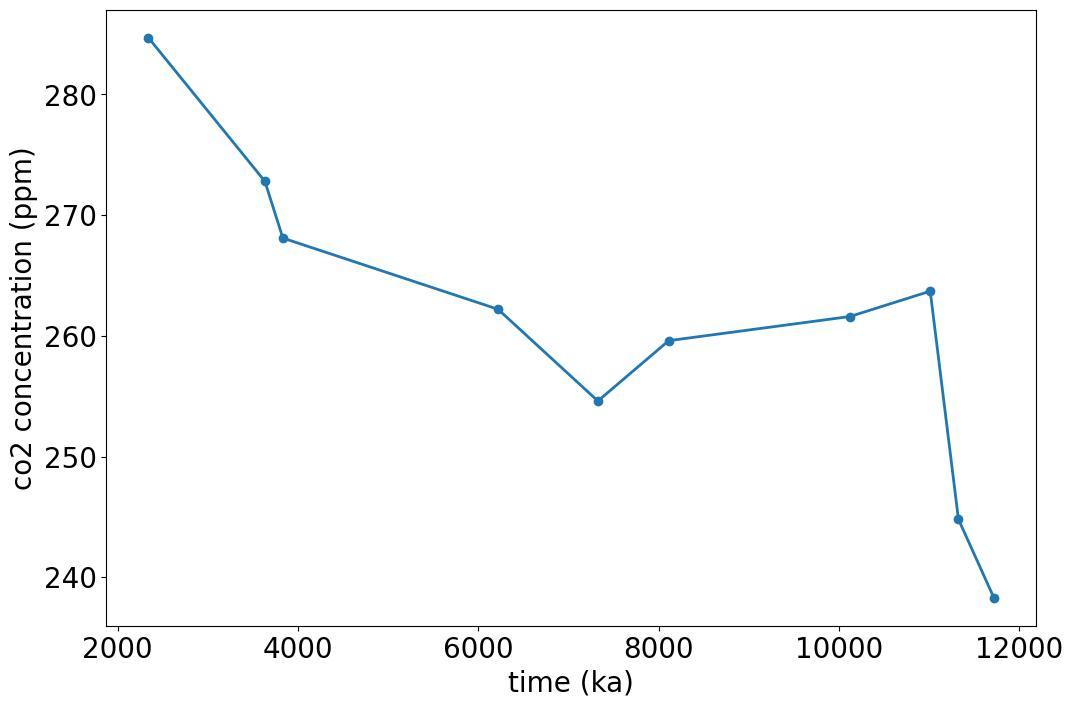

In [17]:
t_data=data["gas age"][:10]
y_data=data["co2"][:10]
plot(t_data,y_data,'-o')
xlabel("time (ka)")
ylabel("co2 concentration (ppm)")
grid()

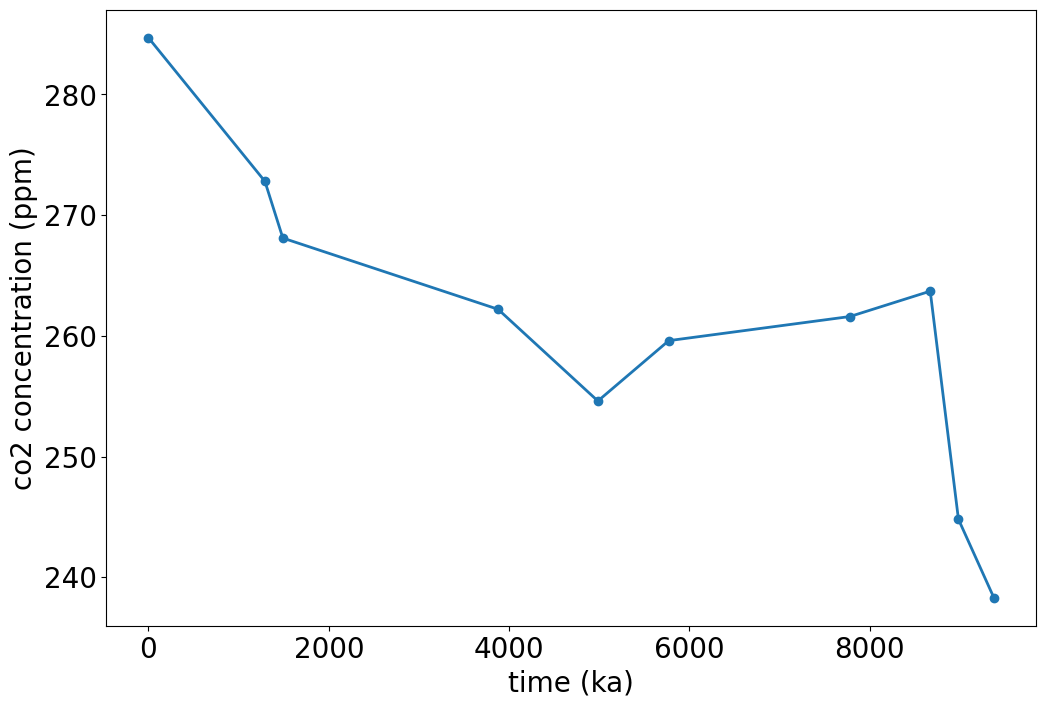

In [19]:
t_data=t_data-t_data[0]  # one way to set the data to start at zero

# or alternatively
t_data=t_data-t_data.min()  # one way to set the data to start at zero

# you don't need both

plot(t_data,y_data,'-o')
xlabel("time (ka)")
ylabel("co2 concentration (ppm)")
grid()